# Survival Analysis

Importing necessary libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from lifelines import LogLogisticAFTFitter, LogNormalAFTFitter, WeibullAFTFitter

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [7]:
data_path = 'C:/Users/user/Desktop/MA/Homework-3/Homework-3/telco.csv'
telco_data = pd.read_csv(data_path)
telco_data.drop('ID', axis=1, inplace=True)

telco_data.head()

,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn
0,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes
1,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes
2,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No
3,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes
4,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No


In [4]:
print(telco_data.isnull().sum())

ID          0
region      0
tenure      0
age         0
marital     0
address     0
income      0
ed          0
retire      0
gender      0
voice       0
internet    0
forward     0
custcat     0
churn       0
dtype: int64


No missing values, we can proceed to data preprocessing.

In [5]:
print(telco_data.dtypes)

ID           int64
region      object
tenure       int64
age          int64
marital     object
address      int64
income       int64
ed          object
retire      object
gender      object
voice       object
internet    object
forward     object
custcat     object
churn       object
dtype: object


In [8]:
df = telco_data.copy()
categories = ['region', 'marital', 'ed', 'retire', 'gender', 'voice', 'internet', 'forward', 'custcat', 'churn']
df = pd.get_dummies(df, columns=categories, drop_first=True)
df = df.rename(columns={'churn_Yes': 'churn'})

print(df.head())

   tenure  age  address  income  region_Zone 2  region_Zone 3  \
0      13   44        9      64           True          False   
1      11   33        7     136          False           True   
2      68   52       24     116          False           True   
3      33   33       12      33           True          False   
4      23   30        9      30           True          False   

   marital_Unmarried  ed_Did not complete high school  ed_High school degree  \
0              False                            False                  False   
1              False                            False                  False   
2              False                             True                  False   
3               True                            False                   True   
4              False                             True                  False   

   ed_Post-undergraduate degree  ed_Some college  retire_Yes  gender_Male  \
0                         False            False   

Finally, we can start building the models on our preprocessed df.

In [9]:
log_logistic_aft = LogLogisticAFTFitter()
log_normal_aft = LogNormalAFTFitter()
weibull_aft = WeibullAFTFitter()

duration_col = 'tenure'
event_col = 'churn'

In [18]:
log_logistic_aft.fit(df, duration_col=duration_col, event_col=event_col)
print("Log-Logistic AFT Model Summary:")
print(log_logistic_aft.print_summary())

Log-Logistic AFT Model Summary:


<lifelines.LogLogisticAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1458.10
         time fit was run = 2024-05-01 18:11:49 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
alpha_ address                           0.04       1.04       0.01             0.02             0.06                 1.02                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.04       2.83       0.17             0.72             1.36                 2.05                 3.91
       custcat_Plus service              0.86       2.37       0.21             0.45             1.27                 1.57                 3.57
       custcat_Total service             1.20       3.33       0.24             0.73             1.67                 2.08                 5.34
       ed_Did not complete high school   0.43       1.54       0.20             0.04             0.82                 1.05                 2.28
       ed_High school degree             0.34       1.40       0.15             0.03             0.64                 1.03                 1.89
       ed_Post-undergraduate degree     -0.02       0.98       0.22            -0.45             0.40                 0.64                 1.49
       ed_Some college                   0.24       1.27       0.16            -0.06             0.55                 0.94                 1.73
       forward_Yes                      -0.19       0.82       0.17            -0.53             0.14                 0.59                 1.15
       gender_Male                       0.04       1.04       0.11            -0.18             0.26                 0.84                 1.29
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.80       0.45       0.14            -1.07            -0.52                 0.34                 0.60
       marital_Unmarried                -0.45       0.64       0.11            -0.66            -0.23                 0.52                 0.80
       region_Zone 2                    -0.05       0.95       0.14            -0.31             0.22                 0.73                 1.24
       region_Zone 3                     0.11       1.12       0.14            -0.15             0.38                 0.86                 1.46
       retire_Yes                        0.06       1.06       0.48            -0.87             1.00                 0.42                 2.71
       voice_Yes                        -0.40       0.67       0.16            -0.72            -0.08                 0.49                 0.92
       Intercept                         2.33      10.33       0.28             1.78             2.89                 5.95                17.93
beta_  Intercept                         0.34       1.40       0.05             0.24             0.44                 1.27                 1.55

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
alpha_ address                             0.00  4.42 <0.005      16.60
       age                                 0.00  4.67 <0.005      18.36
       custcat_E-service                   0.00  6.30 <0.005      31.62
       custcat_Plus service                0.00  4.13 <0.005      14.74
       custcat_Total service               0.00  5.00 <0.005    

None


In [19]:
log_normal_aft.fit(df, duration_col=duration_col, event_col=event_col)
print("Log-Normal AFT Model Summary:")
print(log_normal_aft.print_summary())

Log-Normal AFT Model Summary:


<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1457.01
         time fit was run = 2024-05-01 18:12:06 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
mu_    address                           0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.07       2.90       0.17             0.73             1.40                 2.08                 4.06
       custcat_Plus service              0.92       2.52       0.22             0.50             1.35                 1.65                 3.85
       custcat_Total service             1.20       3.32       0.25             0.71             1.69                 2.03                 5.42
       ed_Did not complete high school   0.37       1.45       0.20            -0.02             0.77                 0.98                 2.16
       ed_High school degree             0.32       1.37       0.16            -0.00             0.64                 1.00                 1.89
       ed_Post-undergraduate degree     -0.03       0.97       0.22            -0.47             0.40                 0.62                 1.50
       ed_Some college                   0.27       1.31       0.17            -0.05             0.60                 0.95                 1.82
       forward_Yes                      -0.20       0.82       0.18            -0.55             0.15                 0.58                 1.17
       gender_Male                       0.05       1.05       0.11            -0.17             0.28                 0.84                 1.32
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.77       0.46       0.14            -1.05            -0.49                 0.35                 0.61
       marital_Unmarried                -0.46       0.63       0.12            -0.68            -0.23                 0.51                 0.80
       region_Zone 2                    -0.10       0.91       0.14            -0.38             0.18                 0.69                 1.20
       region_Zone 3                     0.05       1.05       0.14            -0.23             0.33                 0.80                 1.38
       retire_Yes                        0.02       1.02       0.44            -0.85             0.89                 0.43                 2.44
       voice_Yes                        -0.43       0.65       0.17            -0.76            -0.10                 0.47                 0.90
       Intercept                         2.36      10.61       0.29             1.79             2.94                 5.98                18.84
sigma_ Intercept                         0.28       1.32       0.05             0.19             0.37                 1.20                 1.44

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
mu_    address                             0.00  4.78 <0.005      19.11
       age                                 0.00  4.50 <0.005      17.19
       custcat_E-service                   0.00  6.25 <0.005      31.21
       custcat_Plus service                0.00  4.29 <0.005      15.75
       custcat_Total service               0.00  4.79 <0.005      

None


In [20]:
weibull_aft.fit(df, duration_col=duration_col, event_col=event_col)
print("Weibull AFT Model Summary:")
print(weibull_aft.print_summary())

Weibull AFT Model Summary:


<lifelines.WeibullAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.17
         time fit was run = 2024-05-01 18:12:13 UTC

---
                                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                               
lambda_ address                           0.04       1.04       0.01             0.02             0.06                 1.02                 1.06
        age                               0.03       1.03       0.01             0.01             0.04                 1.01                 1.04
        custcat_E-service                 0.98       2.66       0.16             0.67             1.28                 1.96                 3.61
        custcat_Plus service              0.74       2.10       0.19             0.36             1.12                 1.44                 3.06
        custcat_Total service             1.00       2.71       0.21             0.58             1.41                 1.78                 4.11
        ed_Did not complete high school   0.44       1.55       0.19             0.06             0.82                 1.06                 2.27
        ed_High school degree             0.32       1.38       0.15             0.03             0.61                 1.03                 1.83
        ed_Post-undergraduate degree      0.22       1.25       0.19            -0.15             0.60                 0.86                 1.82
        ed_Some college                   0.25       1.29       0.14            -0.03             0.54                 0.97                 1.71
        forward_Yes                      -0.10       0.91       0.15            -0.39             0.19                 0.68                 1.21
        gender_Male                       0.00       1.00       0.10            -0.20             0.21                 0.82                 1.23
        income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
        internet_Yes                     -0.77       0.46       0.14            -1.04            -0.50                 0.35                 0.61
        marital_Unmarried                -0.35       0.71       0.10            -0.55            -0.14                 0.58                 0.87
        region_Zone 2                    -0.06       0.94       0.13            -0.31             0.19                 0.73                 1.21
        region_Zone 3                     0.12       1.12       0.13            -0.13             0.36                 0.87                 1.44
        retire_Yes                        0.17       1.19       0.52            -0.85             1.19                 0.43                 3.30
        voice_Yes                        -0.34       0.72       0.15            -0.63            -0.04                 0.53                 0.96
        Intercept                         2.78      16.14       0.27             2.25             3.31                 9.48                27.47
rho_    Intercept                         0.17       1.19       0.05             0.07             0.27                 1.08                 1.32

                                          cmp to     z      p   -log2(p)
param   covariate                                                       
lambda_ address                             0.00  4.69 <0.005      18.47
        age                                 0.00  4.12 <0.005      14.69
        custcat_E-service                   0.00  6.28 <0.005      31.44
        custcat_Plus service                0.00  3.83 <0.005      12.95
        custcat_Total service           

None


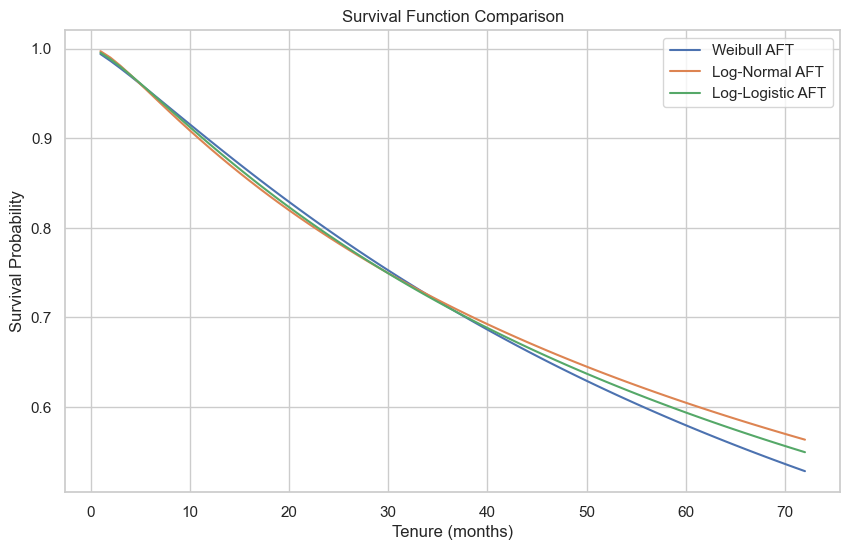

In [22]:
weibull_sf = weibull_aft.predict_survival_function(df)
lognormal_sf = log_normal_aft.predict_survival_function(df)
loglogistic_sf = log_logistic_aft.predict_survival_function(df)

plt.figure(figsize=(10, 6))
plt.plot(weibull_sf.index, weibull_sf.mean(axis=1), label='Weibull AFT')
plt.plot(lognormal_sf.index, lognormal_sf.mean(axis=1), label='Log-Normal AFT')
plt.plot(loglogistic_sf.index, loglogistic_sf.mean(axis=1), label='Log-Logistic AFT')

plt.xlabel('Tenure (months)')
plt.ylabel('Survival Probability')
plt.title('Survival Function Comparison')
plt.legend()
plt.show()

In plot above, each model’s line shows how likely it is that customers will stay over time. They look pretty similar, but there are small differences, especially after 30-33 months. We can clearly see, that after 30 months on some exact period from 3 models highest survival probability is maintained for Log-Normal AFT, after which is for Log-Logistic AFT, and the least is for Weibull AFT. However, those differences are minor and not significant visually. Now, we will proceed to evaluating each model and selecting the best one.

In [27]:
print('Median Survival Time for each model')
print(f'Weibull: {weibull_aft.median_survival_time_}')
print(f'Log-Normal: {log_logistic_aft.median_survival_time_}')
print(f'Log-Logistic: {log_normal_aft.median_survival_time_}')

Median Survival Time for each model
Weibull: 38.8476492867941
Log-Normal: 36.11065472580502
Log-Logistic: 38.953910678318735


The Weibull and Log-Logistic models show similar median survival times, both around 39 months, while the Log-Normal model predicts a slightly shorter median survival time of about 36 months. Overall, still no valuable differences can be seen in models performance.

Model comparison:

In [25]:
print("Log-Logistic AFT Model:")
print("Concordance:", log_logistic_aft.concordance_index_)
print("AIC:", log_logistic_aft.AIC_)

print("\nLog-Normal AFT Model:")
print("Concordance:", log_normal_aft.concordance_index_)
print("AIC:", log_normal_aft.AIC_)

print("\nWeibull AFT Model:")
print("Concordance:", weibull_aft.concordance_index_)
print("AIC:", weibull_aft.AIC_)

Log-Logistic AFT Model:
Concordance: 0.7872217062420478
AIC: 2956.208561443333

Log-Normal AFT Model:
Concordance: 0.7872163376621982
AIC: 2954.0240102517128

Weibull AFT Model:
Concordance: 0.7838180266174188
AIC: 2964.343248083881


Here we can see, that from three models based on their Concordance Index and AIC values, the Log-Normal model is best as it showed the lowest AIC, indicating a potentially better fit. Its Concordance Index is again one of highest ones and nearly equal to that of the Log-Logistic model, suggesting both models have similar predictive accuracy. We will proceed with the Log-Normal model.

Keeping only significant features. From its model summary, we can see, that the highest p_value that can still be remained as significant is for income variable and is 0.13. That's why we will keep features which p_values are lower than 0.15.

In [29]:
best_model = log_normal_aft

In [30]:
p_values = best_model.summary['p']

keep_clmns = p_values[p_values < 0.15]

sign_cols = []
for tuple_ in keep_clmns.keys().tolist():
    sign_cols.append(str(tuple_).split("'")[-2])
sign_cols = sign_cols[:-2]
sign_cols.append('tenure')
sign_cols.append('churn')

df = df.loc[:, sign_cols]
df.head()

,address,age,custcat_E-service,custcat_Plus service,custcat_Total service,ed_Did not complete high school,ed_High school degree,ed_Some college,income,internet_Yes,marital_Unmarried,voice_Yes,tenure,churn
0,9,44,False,False,False,False,False,False,64,False,False,False,13,True
1,7,33,False,False,True,False,False,False,136,False,False,True,11,True
2,24,52,False,True,False,True,False,False,116,False,False,False,68,False
3,12,33,False,False,False,False,True,False,33,False,True,False,33,True
4,9,30,False,True,False,True,False,False,30,False,False,False,23,False


Keeping the best model.

In [31]:
best_model = LogNormalAFTFitter()
best_model.fit(df, duration_col= duration_col, event_col=event_col)

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>

In [56]:
print(best_model.print_summary())

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1458.26
         time fit was run = 2024-05-01 18:56:05 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
mu_    address                           0.04       1.04       0.01             0.02             0.06                 1.02                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.06       2.89       0.17             0.73             1.39                 2.07                 4.03
       custcat_Plus service              0.78       2.18       0.17             0.45             1.11                 1.57                 3.04
       custcat_Total service             1.04       2.83       0.21             0.63             1.45                 1.87                 4.28
       ed_Did not complete high school   0.37       1.45       0.20            -0.01             0.76                 0.99                 2.14
       ed_High school degree             0.32       1.37       0.16             0.01             0.62                 1.01                 1.86
       ed_Some college                   0.27       1.31       0.16            -0.04             0.58                 0.97                 1.79
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.76       0.47       0.14            -1.04            -0.48                 0.35                 0.62
       marital_Unmarried                -0.45       0.64       0.11            -0.68            -0.23                 0.51                 0.80
       voice_Yes                        -0.44       0.64       0.17            -0.77            -0.11                 0.46                 0.89
       Intercept                         2.34      10.35       0.26             1.82             2.86                 6.17                17.38
sigma_ Intercept                         0.28       1.32       0.05             0.19             0.37                 1.21                 1.44

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
mu_    address                             0.00  4.70 <0.005      18.55
       age                                 0.00  4.93 <0.005      20.22
       custcat_E-service                   0.00  6.23 <0.005      31.00
       custcat_Plus service                0.00  4.61 <0.005      17.94
       custcat_Total service               0.00  4.93 <0.005      20.24
       ed_Did not complete high school     0.00  1.91   0.06       4.15
       ed_High school degree               0.00  2.02   0.04       4.53
       ed_Some college                     0.00  1.74   0.08       3.60
       income                              0.00  1.53   0.13       3.00
       internet_Yes                        0.00 -5.34 <0.005      23.33
       marital_Unmarried                   0.00 -3.97 <0.005      13.74
       voice_Yes                           0.00 -2.63   0.01       6.85
       Intercept                           0.00  8.85 <0.005      59.97
sigma_ Intercept                           0.00  6.02 <0.005      29.14
---
Concordance = 0.78
AIC = 2944.52
log-likelihood ratio test = 288.51 on 12 df
-log2(p) of ll-ratio test = 179.11

None


In [33]:
average_margin = 1300  #Value tooken from slide example
discount_rate = 0.1
months = 24

In [42]:
survival_probabilities = best_model.predict_survival_function(df, times=range(1, months+1)).T
discounted_probs = survival_probabilities.apply(lambda x: x / ((1 + discount_rate/12)**(x.index - 1)), axis=0)

In [45]:
df['CLV'] = discounted_probs.apply(np.sum, axis=1) * average_margin
print(df[['CLV']].head(),'\n')

print(df['CLV'].describe())

            CLV
0  28426.381246
1  29024.271706
2  30863.403522
3  25905.356232
4  29221.524128 

count     1000.000000
mean      3377.446913
std       6093.665358
min          3.113173
25%         57.193382
50%        434.230996
75%       3547.626019
max      30863.403522
Name: CLV, dtype: float64


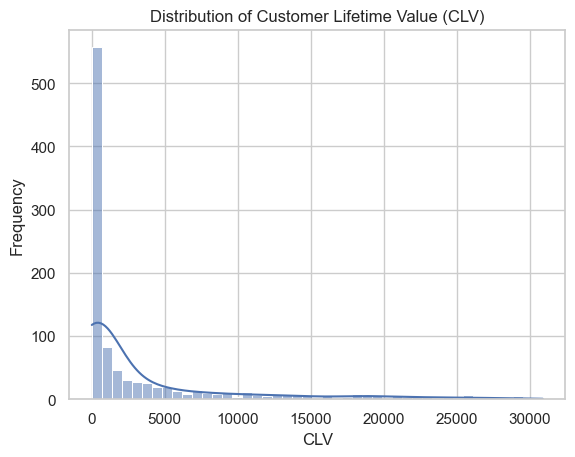

In [51]:
sns.histplot(df['CLV'], kde=True)
plt.title('Distribution of Customer Lifetime Value (CLV)')
plt.xlabel('CLV')
plt.ylabel('Frequency')
plt.show()

<Figure size 1000x600 with 0 Axes>

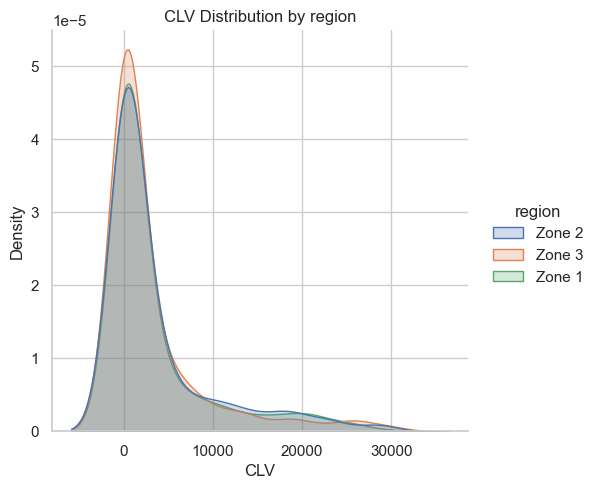

<Figure size 1000x600 with 0 Axes>

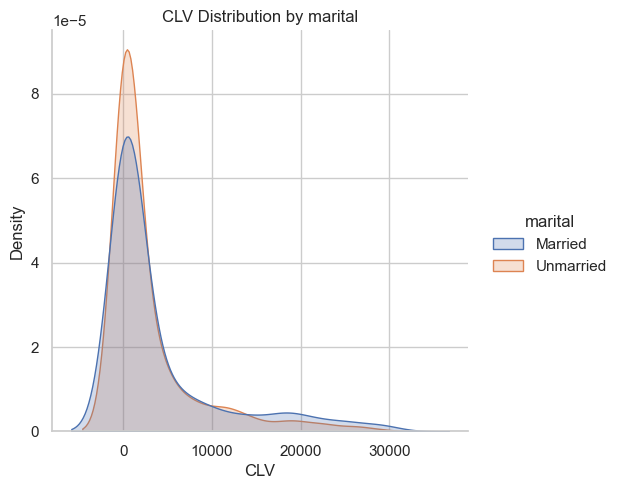

<Figure size 1000x600 with 0 Axes>

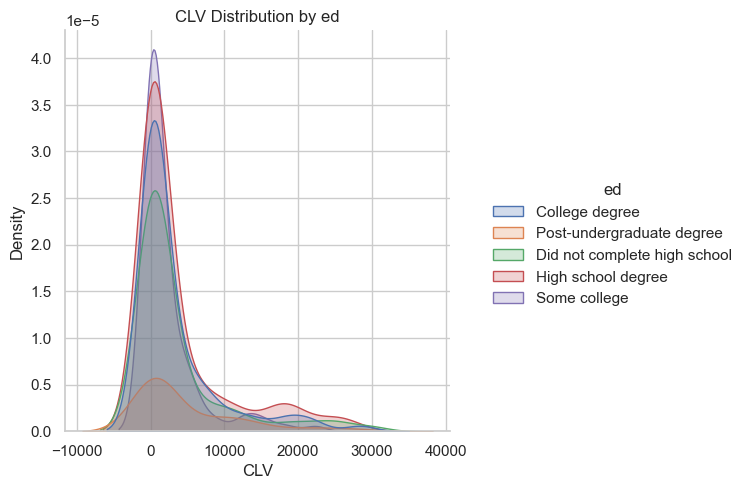

<Figure size 1000x600 with 0 Axes>

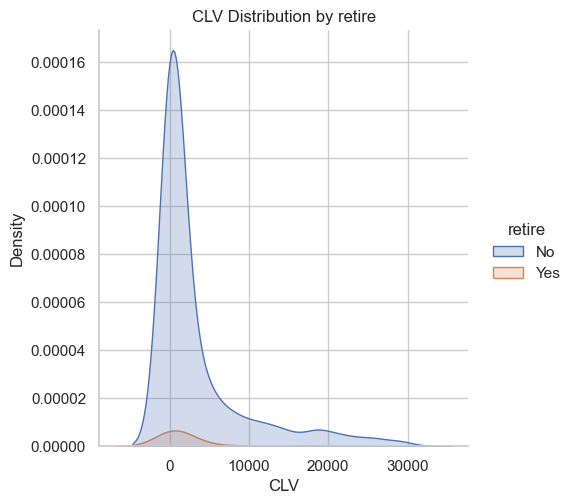

<Figure size 1000x600 with 0 Axes>

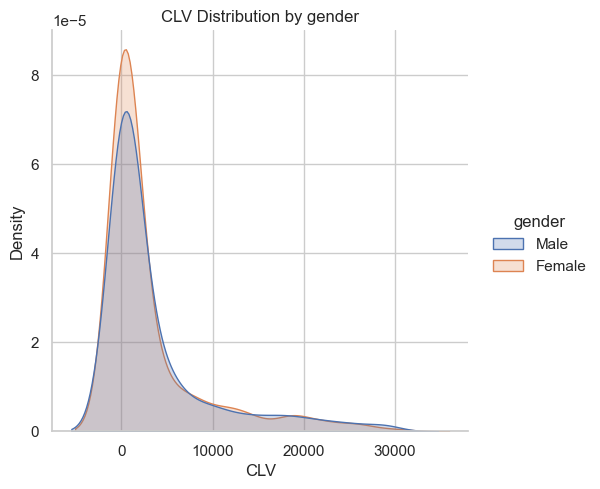

<Figure size 1000x600 with 0 Axes>

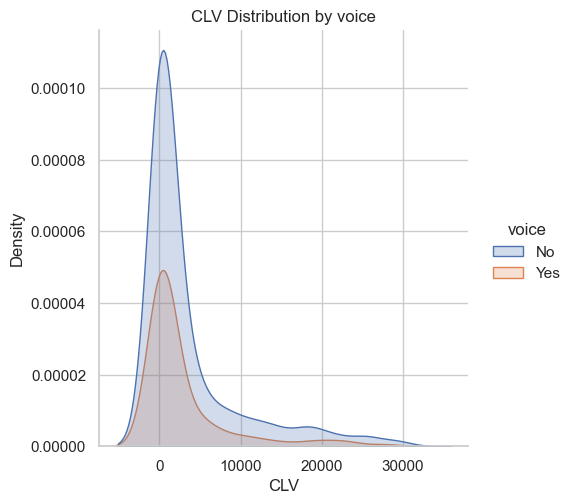

<Figure size 1000x600 with 0 Axes>

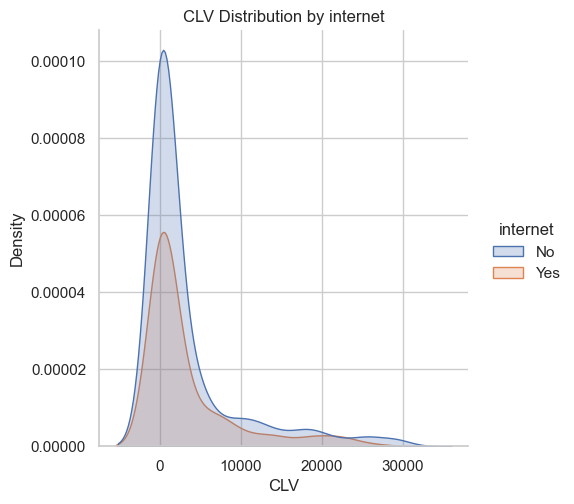

<Figure size 1000x600 with 0 Axes>

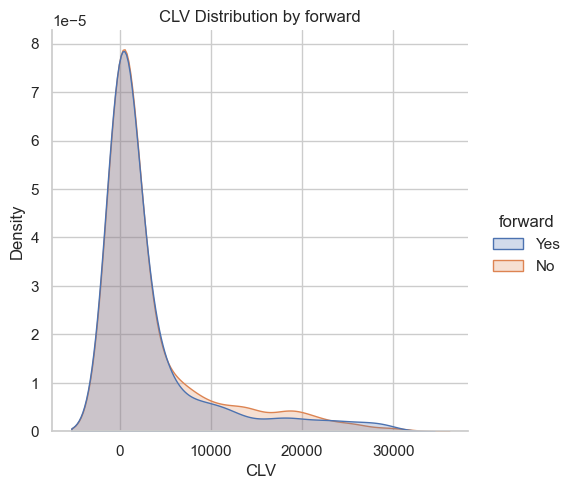

<Figure size 1000x600 with 0 Axes>

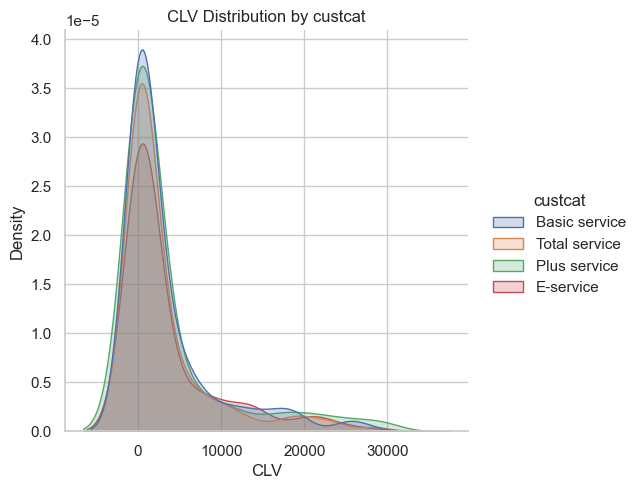

<Figure size 1000x600 with 0 Axes>

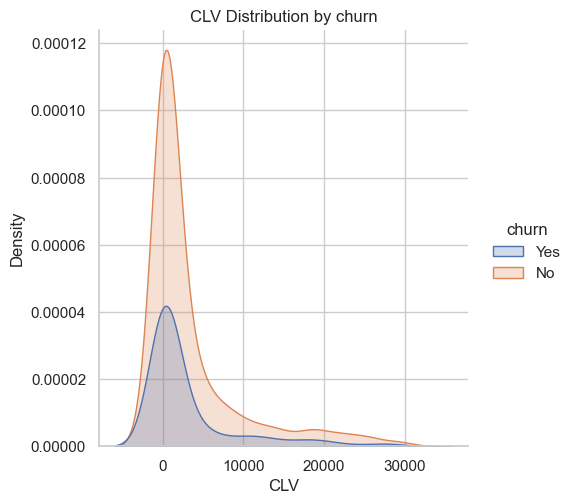

In [53]:
telco_data['CLV'] = df['CLV']
plot_columns = ['region', 'marital', 'ed', 'retire', 'gender', 'voice', 'internet', 'forward', 'custcat', 'churn']

for column in plot_columns:
    plt.figure(figsize=(10, 6))  
    sns.displot(telco_data, kind='kde', x='CLV', hue=column, fill=True)  
    plt.title(f'CLV Distribution by {column}')
    plt.xlabel('CLV')
    plt.ylabel('Density')
    plt.show()

In [55]:
for column in plot_columns:
    mean_clv_by_category = telco_data.groupby(column)['CLV'].mean().reset_index()

    print(f"Mean CLV by {column}:\n{mean_clv_by_category}\n")

Mean CLV by region:
   region          CLV
0  Zone 1  3392.173099
1  Zone 2  3587.930814
2  Zone 3  3159.297334

Mean CLV by marital:
     marital          CLV
0    Married  3832.017631
1  Unmarried  2931.877595

Mean CLV by ed:
                             ed          CLV
0                College degree  3276.291935
1  Did not complete high school  3559.454205
2            High school degree  3822.382023
3     Post-undergraduate degree  4743.485742
4                  Some college  2270.680587

Mean CLV by retire:
  retire         CLV
0     No  3424.36078
1    Yes  2426.19340

Mean CLV by gender:
   gender          CLV
0  Female  3187.466422
1    Male  3580.800771

Mean CLV by voice:
  voice          CLV
0    No  3577.735760
1   Yes  2918.890867

Mean CLV by internet:
  internet          CLV
0       No  3358.449851
1      Yes  3410.072301

Mean CLV by forward:
  forward          CLV
0      No  3519.384851
1     Yes  3231.478283

Mean CLV by custcat:
         custcat          CLV
0  Bas

Let's go over of some of the covariates interpretation in terms of CLV means.

Region:
Zone 2 has the highest mean CLV at 3587.93, suggesting customers in this area are potentially more valuable or have longer tenures.
Zone 1 and Zone 3 have lower mean CLVs of 3392.17 and 3159.30, respectively, which could indicate less engagement or shorter customer lifespans in these areas. Strategies to enhance retention and value in Zones 1 and 3 may be required.

Marital Status:
Married customers show a significantly higher mean CLV (3832.02) compared to Unmarried customers (2931.88). This might reflect stability or a higher likelihood of long-term subscriptions among married customers, potentially due to family or shared services.

Education (ed):
Customers with a Post-undergraduate degree exhibit the highest CLV at 4743.49, possibly indicating higher disposable income or value placed on services.
Those with Some college education have the lowest CLV at 2270.68, which might suggest financial sensitivity or different priorities affecting their longevity with the service.
The gradient in CLV with increasing education levels suggests that targeted offers or loyalty programs could be stratified by educational attainment to maximize retention and value.

Retirement Status:
Non-retired customers have a higher mean CLV (3424.36) compared to Retired customers (2426.19). The difference may stem from varying service needs or income levels, with retired individuals possibly downsizing or reducing expenses.

Gender:
Male customers have a higher mean CLV (3580.80) than Female customers (3187.47). This could indicate differences in usage patterns, preferences, or engagement levels with the services offered.

# Report

### Interpreting Factors Affecting Churn Risk

Our analysis employed several survival models to investigate the factors influencing customer churn in the telecommunications sector. The coefficients from the best model, which is Log-Normal AFT, indicate significant predictors of churn. In our survival analysis, both address and age show positive, statistically significant coefficients, suggesting that increased age and longer residence are associated with lower churn risks, as older or more settled individuals tend to remain with the service longer. Customer categories such as E-service, Plus service, and Total service also exhibit positive coefficients, indicating higher retention rates likely due to perceived value or satisfaction with these enhanced services. Educational attainment like completing high school shows positive effects on retention, whereas features like Internet and voice services, which have negative coefficients, suggest higher churn risks in these segments. Additionally, unmarried status correlates with higher churn, possibly reflecting different lifestyle needs or financial priorities. These findings highlight key areas for targeted customer retention strategies.

### Valuable Customer Segments

Education: Customers with a Post-undergraduate degree show the highest CLV at 4743.49, indicating high value and potentially greater service utilization or loyalty.
Marital Status: Married customers have a significantly higher CLV of 3832.02 compared to unmarried counterparts, likely reflecting more stable and committed usage patterns.
Region: Customers in Zone 2 have a higher CLV of 3587.93, suggesting that this region may have better service satisfaction or less competitive alternatives.
Customer Category: Those subscribed to Plus service and E-service show higher CLVs of 3595.36 and 3558.50 respectively, pointing to these service tiers as particularly valuable.

### Annual Retention Budget

An average CLV of approximately 3500 for high-risk segments,
An estimated 20% of the population at significant churn risk,
If aiming to retain at least 10% of this potential revenue loss, we calculate the retention budget as follows:

Total at-risk CLV per year = 20% of customers x average high-risk CLV = 0.20 x 3500 = 700 per customer.
Desired revenue retention = 10% x 700 = 70 per at-risk customer.
Assuming a customer base of 1000 (for simplicity), that's 200 at-risk customers x 70 = 14,000 annually.

### Retention Strategies

Targeted Engagement and Personalization: Use data analytics to tailor promotions and communications specifically to high-value segments like postgraduate-educated customers or those in premium service categories.
Loyalty Programs and Rewards: Develop loyalty programs that incentivize long-term engagement, especially for married customers and those in high-value regions (Zone 2). These could include rewards that grow with tenure or usage.
Enhanced Customer Support: For services like internet and voice, where there's higher churn, enhance support and quality assurance measures to address common pain points.
Feedback and Adaptation: Implement a robust feedback loop from customers to continuously refine and adapt services to meet evolving customer needs and expectations.
